In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv('/content/wine-clustering.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


K-means

In [ ]:
# формируем данные из датасета
X = data.iloc[:, [3, 4]].values # Annual Income and Spending Score

In [ ]:

# Выбор наиболее важных признаков
selected_features = ['Alcohol', 'Total_Phenols', 'Flavanoids', 'Color_Intensity']

# Формирование матрицы X
X = data[selected_features]


In [ ]:
missing_values = X.isnull().sum()
print(missing_values)

Alcohol            0
Total_Phenols      0
Flavanoids         0
Color_Intensity    0
dtype: int64


In [ ]:
X.dtypes

Alcohol            float64
Total_Phenols      float64
Flavanoids         float64
Color_Intensity    float64
dtype: object

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Создание экземпляра MinMaxScaler
scaler = MinMaxScaler()

# Применение MinMaxScaler к матрице X
X = scaler.fit_transform(X)

# X_normalized теперь содержит нормализованные значения


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

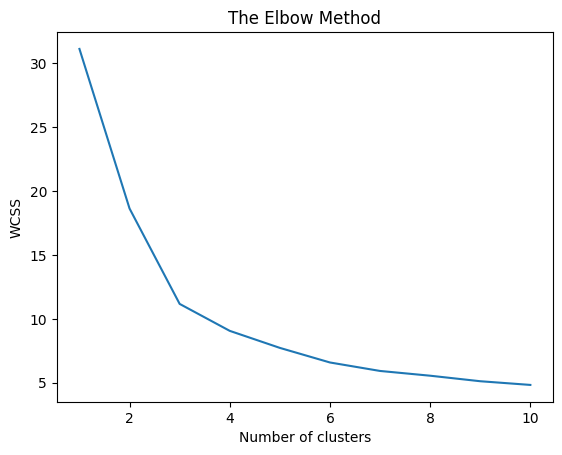

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


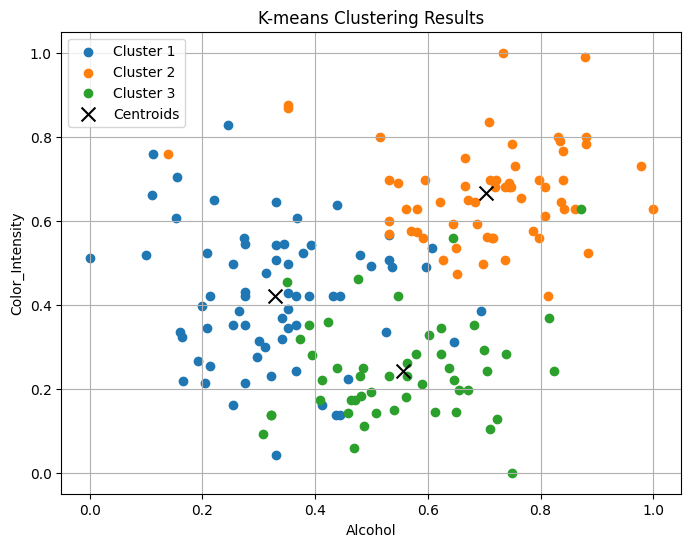

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Создание экземпляра MinMaxScaler для нормализации
scaler = MinMaxScaler()

# Нормализация значений в матрице X
X_normalized = scaler.fit_transform(X)

# Выбираем два параметра из матрицы X для визуализации
feature1 = 'Alcohol'
feature2 = 'Color_Intensity'

# Получение индексов выбранных признаков в матрице X
feature_names = ['Alcohol', 'Color_Intensity']
feature1_index = feature_names.index(feature1)
feature2_index = feature_names.index(feature2)

# Проведение кластеризации методом K-means с оптимальным числом кластеров
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_normalized)

# Визуализация результатов кластеризации
plt.figure(figsize=(8, 6))

# Построение точек данных для каждого кластера
for cluster in range(optimal_k):
    plt.scatter(X_normalized[kmeans.labels_ == cluster, feature1_index],
                X_normalized[kmeans.labels_ == cluster, feature2_index],
                label=f'Cluster {cluster + 1}')

# Построение центроидов кластеров
plt.scatter(kmeans.cluster_centers_[:, feature1_index],
            kmeans.cluster_centers_[:, feature2_index],
            marker='x', s=100, color='k', label='Centroids')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('K-means Clustering Results')
plt.legend()
plt.grid(True)
plt.show()


Иерархическая кластеризация

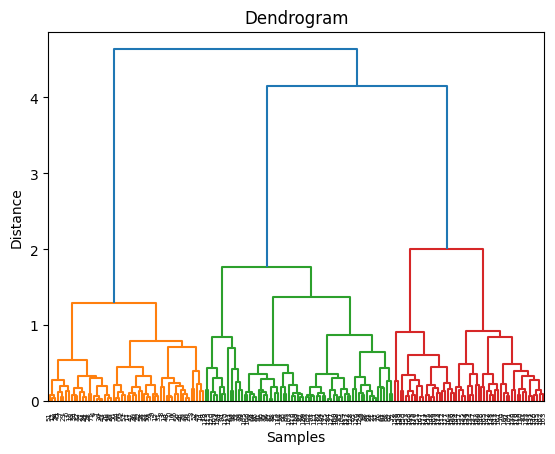

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

mergings = linkage(X, method = 'ward')
dendrogram(mergings)

plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

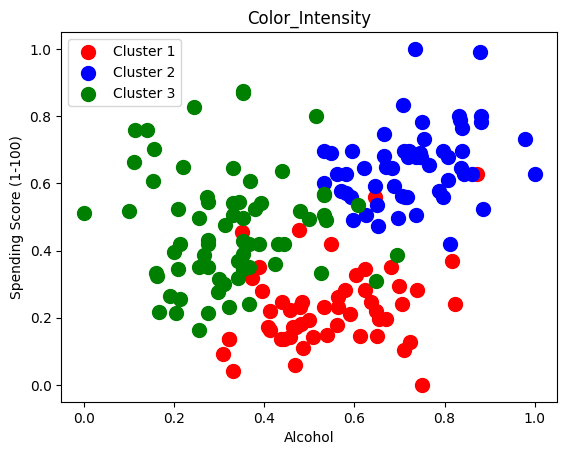

In [ ]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Color_Intensity')
plt.xlabel('Alcohol')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# Расчет силуэта для K-means
silhouette_kmeans = silhouette_score(X_normalized, kmeans.labels_)
print("Силуэт для K-means:", silhouette_kmeans)

# Расчет силуэта для иерархической кластеризации
silhouette_hierarchical = silhouette_score(X_normalized, y_hc)
print("Силуэт для иерархической кластеризации:", silhouette_hierarchical)


Силуэт для K-means: 0.4203929056210451
Силуэт для иерархической кластеризации: 0.4037089242233176


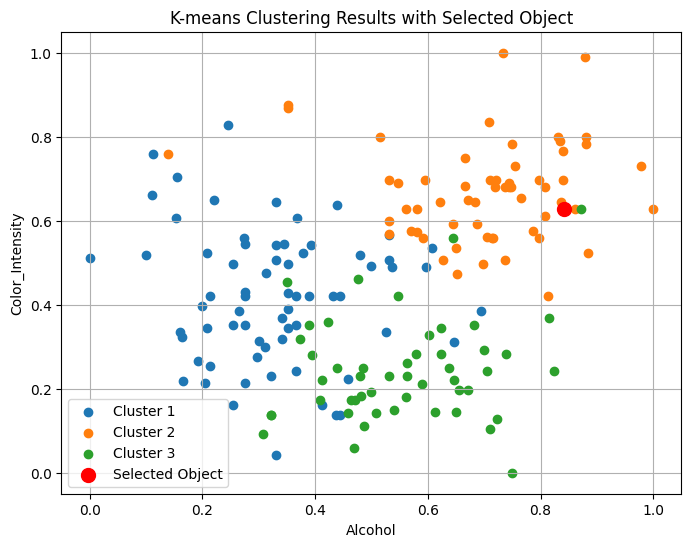

In [ ]:
# Выбираем индекс объекта, который хотим визуализировать
index = 0  # Пример

# Находим кластер, к которому относится выбранный объект
cluster_index = kmeans.labels_[index]  # Используем kmeans, можно заменить на другую модель

# Создаем график
plt.figure(figsize=(8, 6))

# Построение точек данных для каждого кластера
for cluster in range(optimal_k):
    plt.scatter(X_normalized[kmeans.labels_ == cluster, feature1_index],
                X_normalized[kmeans.labels_ == cluster, feature2_index],
                label=f'Cluster {cluster + 1}')

# Построение точки для выбранного объекта
plt.scatter(X_normalized[index, feature1_index], X_normalized[index, feature2_index],
            color='red', s=100, label='Selected Object')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('K-means Clustering Results with Selected Object')
plt.legend()
plt.grid(True)
plt.show()
